# 📓 Lagrangian Mechanics Tutorial
## 🔹 Example 4: Cart with Rigid Pendulum (Including Rotational Inertia and External Force)

In [2]:
from sympy import symbols, Function, diff, simplify, solve, Eq, dsolve, sin, cos
from sympy.physics.mechanics import dynamicsymbols
from sympy import init_printing
from IPython.display import display

init_printing()



## 🔹 1. Define Coordinates and Time
Let the cart move horizontally with coordinate $x(t)$ and the pendulum swing with angle $\theta(t)$ from the vertical (downward).

The pendulum is a rigid rod of length $l$ and mass $m$, pivoted at one end on the cart.

<img src="https://jsteinhardt.stat.berkeley.edu/images/Cart-pendulum.png" />

In [3]:
t = symbols('t')
x = dynamicsymbols('x')             # Cart position
theta = dynamicsymbols('theta')     # Pendulum angle from vertical

m, M, l, g, F = symbols('m M l g F')  # pendulum mass, cart mass, length, gravity, external force


## 🔹 2. Kinetic Energy $T$
The cart moves horizontally. The pendulum contributes both translational kinetic energy (via its center of mass) and rotational kinetic energy:

- CoM of pendulum: located at $l/2$ from pivot
- Moment of inertia of uniform rod about one end: $I = \frac{1}{3} m l^2$

In [4]:
x_dot = diff(x, t)
theta_dot = diff(theta, t)

# Position of pendulum's center of mass
x_cm = x + (l/2) * sin(theta)
y_cm = -(l/2) * cos(theta)

vx_cm = diff(x_cm, t)
vy_cm = diff(y_cm, t)

# Moment of inertia of rod about pivot
I = (1/3) * m * l**2

# Total kinetic energy: cart + pendulum (translation + rotation)
T = (1/2) * M * x_dot**2 + (1/2) * m * (vx_cm**2 + vy_cm**2) + (1/2) * I * theta_dot**2
T = simplify(T)
display(T)

## 🔹 3. Potential Energy $V$

$$
V = -m g \frac{l}{2} \cos\theta
$$

In [5]:
V = -m * g * (l/2) * cos(theta)
display(V)

## 🔹 4. Lagrangian $L = T - V$

In [6]:
L = T - V
display(L)

## 🔹 5. Euler-Lagrange Equations
For $x(t)$ (with external force $F$):

$$
\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{x}} \right) - \frac{\partial L}{\partial x} = F
$$

For $\theta(t)$:

$$
\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{\theta}} \right) - \frac{\partial L}{\partial \theta} = 0
$$

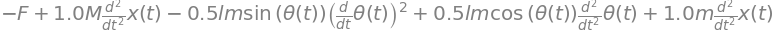

In [7]:
# Equation for x
dL_dx = diff(L, x)
dL_dx_dot = diff(L, x_dot)
d_dt_dL_dx_dot = diff(dL_dx_dot, t)
EL_x = simplify(d_dt_dL_dx_dot - dL_dx - F)
display(EL_x)

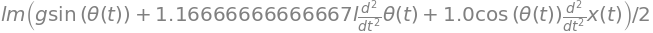

In [8]:
# Equation for theta
dL_dtheta = diff(L, theta)
dL_dtheta_dot = diff(L, theta_dot)
d_dt_dL_dtheta_dot = diff(dL_dtheta_dot, t)
EL_theta = simplify(d_dt_dL_dtheta_dot - dL_dtheta)
display(EL_theta)

## ✅ Final Result
These are the full nonlinear coupled equations for the cart and rigid pendulum, including the pendulum's rotational inertia.

## 🌟 Conclusion
We now have a fully accurate symbolic model of a cart-pendulum system using Lagrangian mechanics — including the effect of rotational inertia of the pendulum and external driving force.